### Chapter 1

#### Summarizing the data
You'll continue your EDA in this exercise by computing summary statistics for the numeric data in the dataset. The data has been pre-loaded into a DataFrame called df.

You can use df.info() in the IPython Shell to determine which columns of the data are numeric, specifically type float64. You'll notice that there are two numeric columns, called FTE and Total.

FTE: Stands for "full-time equivalent". If the budget item is associated to an employee, this number tells us the percentage of full-time that the employee works. A value of 1 means the associated employee works for the school full-time. A value close to 0 means the item is associated to a part-time or contracted employee.
Total: Stands for the total cost of the expenditure. This number tells us how much the budget item cost.
After printing summary statistics for the numeric data, your job is to plot a histogram of the non-null FTE column to see the distribution of part-time and full-time employees in the dataset.

##### INSTRUCTIONS

Print summary statistics of the numeric columns in the DataFrame df using the .describe() method.
Import matplotlib.pyplot as plt.
Create a histogram of the non-null 'FTE' column. You can do this by passing df['FTE'].dropna() to plt.hist().
The title has been specified and axes have been labeled, so hit 'Submit Answer' to see how often school employees work full-time!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', 60)

In [2]:
from timeit import default_timer as timer

##### The data here is different from what they use in the tutorial.  In particular, plots don't look the same.

The tutorial dataset is downsized to 1500 rows.  Don't know if it's specially selected but I assume they made sure labels were all populated.

In [3]:
df = pd.read_csv('data/TrainingData.csv', index_col=0)

In [85]:
df.head()

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,Text_2,SubFund_Description,Job_Title_Description,Text_3,Text_4,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
134338,Teacher Compensation,Instruction,School Reported,School,NO_LABEL,Teacher,NO_LABEL,NO_LABEL,PreK-12 Operating,NaN,NaN,NaN,Teacher-Elementary,NaN,NaN,NaN,NaN,1.0,NaN,NaN,KINDERGARTEN,50471.810,KINDERGARTEN,General Fund,NaN
206341,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,CONTRACTOR SERVICES,BOND EXPENDITURES,BUILDING FUND,(blank),Regular,NaN,NaN,NaN,NaN,RGN GOB,NaN,UNDESIGNATED,3477.860,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES
326408,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,Personal Services - Teachers,NaN,NaN,TCHER 2ND GRADE,NaN,Regular Instruction,NaN,NaN,1.0,NaN,NaN,TEACHER,62237.130,Instruction - Regular,General Purpose School,NaN
364634,Substitute Compensation,Instruction,School Reported,School,Unspecified,Substitute,Benefits,NO_LABEL,PreK-12 Operating,EMPLOYEE BENEFITS,TEACHER SUBS,GENERAL FUND,"Teacher, Short Term Sub",Regular,NaN,NaN,NaN,NaN,UNALLOC BUDGETS/SCHOOLS,NaN,PROFESSIONAL-INSTRUCTIONAL,22.300,GENERAL MIDDLE/JUNIOR HIGH SCH,NaN,REGULAR INSTRUCTION
47683,Substitute Compensation,Instruction,School Reported,School,Unspecified,Teacher,Substitute Compensation,NO_LABEL,PreK-12 Operating,TEACHER COVERAGE FOR TEACHER,TEACHER SUBS,GENERAL FUND,"Teacher, Secondary (High)",Alternative,NaN,NaN,NaN,NaN,NON-PROJECT,NaN,PROFESSIONAL-INSTRUCTIONAL,54.166,GENERAL HIGH SCHOOL EDUCATION,NaN,REGULAR INSTRUCTION


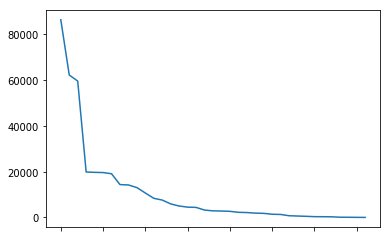

In [100]:
df.Function.value_counts().plot();

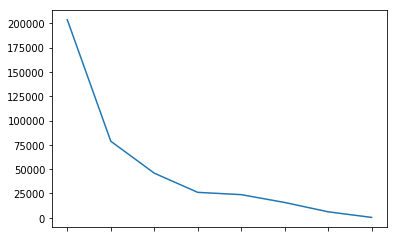

In [94]:
df.Use.value_counts().plot();

                 FTE         Total
count  126071.000000  3.957220e+05
mean        0.426794  1.310586e+04
std         0.573576  3.682254e+05
min        -0.087551 -8.746631e+07
25%         0.000792  7.379770e+01
50%         0.130927  4.612300e+02
75%         1.000000  3.652662e+03
max        46.800000  1.297000e+08


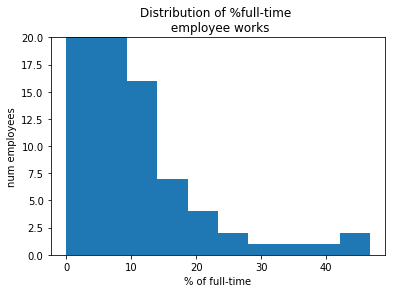

In [4]:
# Print the summary statistics
print(df.describe())

# Import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt

# Create the histogram
plt.hist(df.FTE.dropna())

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')
plt.ylim(0, 20)

# Display the histogram
plt.show()

In [5]:
len(df.FTE.dropna().value_counts())

21003

In [6]:
# df.FTE.dropna()[df.FTE.dropna().argmax()]
# argmax deprecated - use idxmax instead
df.FTE.dropna()[df.FTE.dropna().idxmax()]

46.8

In [7]:
df[df.FTE == 46.8]

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,Text_2,SubFund_Description,Job_Title_Description,Text_3,Text_4,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
135371,Food Services,O&M,Shared Services,School,Unspecified,Other,Base Salary/Compensation,Non PreK,PreK-12 Operating,Personal Services - Food Services - Cafeteria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.8,NaN,NaN,NaN,528191.986943,Food Services,Central Cafeteria,NaN


##### Aha, it's the cafeteria ladies....

So a line item can represent more than one employee and in lots of places it does.  But mostly not the case.

In [8]:
(df.FTE <= 1.0).sum()

123003

In [9]:
(df.FTE > 1.0).sum()

3068

##### And that's why my histogram looks different than his...

##### take a quick look at the dtypes

In [10]:
df.dtypes

Function                   object
Use                        object
Sharing                    object
Reporting                  object
Student_Type               object
Position_Type              object
Object_Type                object
Pre_K                      object
Operating_Status           object
Object_Description         object
Text_2                     object
SubFund_Description        object
Job_Title_Description      object
Text_3                     object
Text_4                     object
Sub_Object_Description     object
Location_Description       object
FTE                       float64
Function_Description       object
Facility_or_Department     object
Position_Extra             object
Total                     float64
Program_Description        object
Fund_Description           object
Text_1                     object
dtype: object

#### Encode the labels as categorical variables
Remember, your ultimate goal is to predict the probability that a certain label is attached to a budget line item. You just saw that many columns in your data are the inefficient object type. Does this include the labels you're trying to predict? Let's find out!

There are 9 columns of labels in the dataset. Each of these columns is a category that has many possible values it can take). The 9 labels have been loaded into a list called LABELS. In the Shell, check out the type for these labels using df[LABELS].dtypes.

You will notice that every label is encoded as an object datatype. Because category datatypes are much more efficient your task is to convert the labels to category types using the .astype() method.

Note: .astype() only works on a pandas Series. Since you are working with a pandas DataFrame, you'll need to use the .apply() method and provide a lambda function called categorize_label that applies .astype() to each column, x.

##### INSTRUCTIONS

Define the lambda function categorize_label to convert column x into x.astype('category').
Use the LABELS list provided to convert the subset of data df[LABELS] to categorical types using the .apply() method and categorize_label. Don't forget axis=0.
Print the converted .dtypes attribute of df[LABELS].

In [11]:
### bind variable LABELS - these are actually the targets and we're going to one-hot encode them...
LABELS = ['Function',  'Use',  'Sharing',  'Reporting',  'Student_Type',  'Position_Type', 
          'Object_Type',  'Pre_K',  'Operating_Status']

### This turns out to be key.  Submission requires the dummy versions of these vars to be in this order.
LABELS.sort()

# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# Convert df[LABELS] to a categorical type
df[LABELS] = df[LABELS].apply(categorize_label, axis=0)

# Print the converted dtypes
print(df[LABELS].dtypes)

Function            category
Object_Type         category
Operating_Status    category
Position_Type       category
Pre_K               category
Reporting           category
Sharing             category
Student_Type        category
Use                 category
dtype: object


#### Counting unique labels
As Peter mentioned in the video, there are over 100 unique labels. In this exercise, you will explore this fact by counting and plotting the number of unique values for each category of label.

The dataframe df and the LABELS list have been loaded into the workspace; the LABELS columns of df have been converted to category types.

pandas, which has been pre-imported as pd, provides a pd.Series.nunique method for counting the number of unique values in a Series.

##### INSTRUCTIONS

Create the DataFrame num_unique_labels by using the .apply() method on df[LABELS] with pd.Series.nunique as the argument.
Create a bar plot of num_unique_labels using pandas' .plot(kind='bar') method.
The axes have been labeled for you, so hit 'Submit Answer' to see the number of unique values for each label.


In [12]:
df.dtypes

Function                  category
Use                       category
Sharing                   category
Reporting                 category
Student_Type              category
Position_Type             category
Object_Type               category
Pre_K                     category
Operating_Status          category
Object_Description          object
Text_2                      object
SubFund_Description         object
Job_Title_Description       object
Text_3                      object
Text_4                      object
Sub_Object_Description      object
Location_Description        object
FTE                        float64
Function_Description        object
Facility_or_Department      object
Position_Extra              object
Total                      float64
Program_Description         object
Fund_Description            object
Text_1                      object
dtype: object

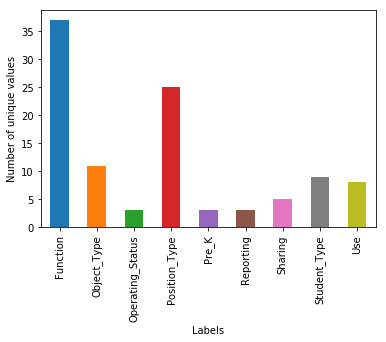

In [13]:
# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = df[LABELS].apply(pd.Series.nunique, axis=0)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

In [14]:
num_unique_labels

Function            37
Object_Type         11
Operating_Status     3
Position_Type       25
Pre_K                3
Reporting            3
Sharing              5
Student_Type         9
Use                  8
dtype: int64

In [15]:
np.sum(num_unique_labels)

104

##### Let's save the unique labels for each output (category)

In [16]:
{col : df[col].unique().tolist() for col in df[LABELS].columns}

{'Function': ['Teacher Compensation',
  'NO_LABEL',
  'Substitute Compensation',
  'Facilities & Maintenance',
  'Instructional Materials & Supplies',
  'Food Services',
  'Security & Safety',
  'Utilities',
  'Student Transportation',
  'Parent & Community Relations',
  'Extended Time & Tutoring',
  'Enrichment',
  'Special Population Program Management & Support',
  'School Supervision',
  'Data Processing & Information Services',
  'Aides Compensation',
  'Physical Health & Services',
  'Career & Academic Counseling',
  'Library & Media',
  'Professional Development',
  'School Administration',
  'Other Non-Compensation',
  'Social & Emotional',
  'Finance, Budget, Purchasing & Distribution',
  'Human Resources',
  'Curriculum Development',
  'Legal',
  'Other Compensation',
  'Student Assignment',
  'Governance',
  'Development & Fundraising',
  'Research & Accountability',
  'Recruitment',
  'Insurance',
  'Untracked Budget Set-Aside',
  'Communications',
  'Facilities Planning'],

#### Computing log loss with NumPy
To see how the log loss metric handles the trade-off between accuracy and confidence, we will use some sample data generated with NumPy and compute the log loss using the provided function compute_log_loss(), which Peter showed you in the video.

5 one-dimensional numeric arrays simulating different types of predictions have been pre-loaded: actual_labels, correct_confident, correct_not_confident, wrong_not_confident, and wrong_confident.

Your job is to compute the log loss for each sample set provided using the compute_log_loss(predicted_values, actual_values). It takes the predicted values as the first argument and the actual values as the second argument.

##### INSTRUCTIONS

Using the compute_log_loss() function, compute the log loss for the following predicted values (in each case, the actual values are contained in actual_labels):
correct_confident.
correct_not_confident.
wrong_not_confident.
wrong_confident.
actual_labels.

In [17]:
correct_confident = np.array([ 0.95,  0.95,  0.95,  0.95,  0.95,  0.05,  0.05,  0.05,  0.05,  0.05])
correct_not_confident = np.array([ 0.65,  0.65,  0.65,  0.65,  0.65,  0.35,  0.35,  0.35,  0.35,  0.35])
wrong_not_confident = np.array([ 0.35,  0.35,  0.35,  0.35,  0.35,  0.65,  0.65,  0.65,  0.65,  0.65])
wrong_confident = np.array([ 0.05,  0.05,  0.05,  0.05,  0.05,  0.95,  0.95,  0.95,  0.95,  0.95])
actual_labels = np.array([ 1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])                                               

In [18]:
# Compute and print log loss for 1st case
from log_loss import compute_log_loss
from sklearn.metrics import log_loss
# sklearn.metrics.log_loss
print(log_loss(actual_labels, correct_confident))
correct_confident = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident)) 

print(log_loss(actual_labels, correct_not_confident))
# Compute log loss for 2nd case
correct_not_confident = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident)) 

print(log_loss(actual_labels, wrong_not_confident))
# Compute and print log loss for 3rd case
wrong_not_confident = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident)) 

# Compute and print log loss for 4th case
print(log_loss(actual_labels, wrong_confident ))
wrong_confident = compute_log_loss(wrong_confident ,actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident)) 

print(log_loss(actual_labels, actual_labels))
# Compute and print log loss for actual labels
actual_labels = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels)) 


0.05129329438755058
Log loss, correct and confident: 0.05129329438755058
0.4307829160924542
Log loss, correct and not confident: 0.4307829160924542
1.049822124498678
Log loss, wrong and not confident: 1.049822124498678
2.9957322735539904
Log loss, wrong and confident: 2.9957322735539904
9.992007221626413e-16
Log loss, actual labels: 9.99200722162646e-15


##### End of chapter 1

### Chapter 2

#### Setting up a train-test split in scikit-learn
Alright, you've been patient and awesome. It's finally time to start training models!

The first step is to split the data into a training set and a test set. Some labels don't occur very often, but we want to make sure that they appear in both the training and the test sets. We provide a function that will make sure at least min_count examples of each label appear in each split: multilabel_train_test_split.

Feel free to check out the full code for multilabel_train_test_split here.

You'll start with a simple model that uses just the numeric columns of your DataFrame when calling multilabel_train_test_split. The data has been read into a DataFrame df and a list consisting of just the numeric columns is available as NUMERIC_COLUMNS.

##### INSTRUCTIONS

Create a new DataFrame named numeric_data_only by applying the .fillna(-1000) method to the numeric columns (available in the list NUMERIC_COLUMNS) of df.
Convert the labels (available in the list LABELS) to dummy variables. Save the result as label_dummies.
In the call to multilabel_train_test_split(), set the size of your test set to be 0.2. Use a seed of 123.
Fill in the .info() method calls for X_train, X_test, y_train, and y_test.

In [19]:
from multilabel import multilabel_train_test_split

In [20]:
NUMERIC_COLUMNS = ['FTE', 'Total']

In [99]:
print(label_dummies.columns.tolist())

['Function_Aides Compensation', 'Function_Career & Academic Counseling', 'Function_Communications', 'Function_Curriculum Development', 'Function_Data Processing & Information Services', 'Function_Development & Fundraising', 'Function_Enrichment', 'Function_Extended Time & Tutoring', 'Function_Facilities & Maintenance', 'Function_Facilities Planning', 'Function_Finance, Budget, Purchasing & Distribution', 'Function_Food Services', 'Function_Governance', 'Function_Human Resources', 'Function_Instructional Materials & Supplies', 'Function_Insurance', 'Function_Legal', 'Function_Library & Media', 'Function_NO_LABEL', 'Function_Other Compensation', 'Function_Other Non-Compensation', 'Function_Parent & Community Relations', 'Function_Physical Health & Services', 'Function_Professional Development', 'Function_Recruitment', 'Function_Research & Accountability', 'Function_School Administration', 'Function_School Supervision', 'Function_Security & Safety', 'Function_Social & Emotional', 'Functio

In [21]:
# Create the new DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only,
                                                               label_dummies,
                                                               size=0.2, 
                                                               seed=123)

# Print the info
print("X_train info:")
print(X_train.info())
print("\nX_test info:")  
print(X_test.info())
print("\ny_train info:")  
print(y_train.info())
print("\ny_test info:")  
print(y_test.info()) 


X_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 320222 entries, 134338 to 415831
Data columns (total 2 columns):
FTE      320222 non-null float64
Total    320222 non-null float64
dtypes: float64(2)
memory usage: 7.3 MB
None

X_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80055 entries, 206341 to 413949
Data columns (total 2 columns):
FTE      80055 non-null float64
Total    80055 non-null float64
dtypes: float64(2)
memory usage: 1.8 MB
None

y_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 320222 entries, 134338 to 415831
Columns: 104 entries, Function_Aides Compensation to Use_Untracked Budget Set-Aside
dtypes: uint8(104)
memory usage: 34.2 MB
None

y_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80055 entries, 206341 to 413949
Columns: 104 entries, Function_Aides Compensation to Use_Untracked Budget Set-Aside
dtypes: uint8(104)
memory usage: 8.6 MB
None


In [22]:
df[NUMERIC_COLUMNS].shape

(400277, 2)

#### Training a model
With split data in hand, you're only a few lines away from training a model.

In this exercise, you will import the logistic regression and one versus rest classifiers in order to fit a multi-class logistic regression model to the NUMERIC_COLUMNS of your feature data.

Then you'll test and print the accuracy with the .score() method to see the results of training.

Before you train! Remember, we're ultimately going to be using logloss to score our model, so don't worry too much about the accuracy here. Keep in mind that you're throwing away all of the text data in the dataset - that's by far most of the data! So don't get your hopes up for a killer performance just yet. We're just interested in getting things up and running at the moment.

All data necessary to call multilabel_train_test_split() has been loaded into the workspace.

##### INSTRUCTIONS

Import LogisticRegression from sklearn.linear_model and OneVsRestClassifier from sklearn.multiclass.
Instantiate the classifier clf by placing LogisticRegression() inside OneVsRestClassifier().
Fit the classifier to the training data X_train and y_train.
Compute and print the accuracy of the classifier using its .score() method, which accepts two arguments: X_test and y_test.

In [23]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Create the DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only,
                                                               label_dummies,
                                                               size=0.2, 
                                                               seed=123)

# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression(), n_jobs=-1)

start = timer()
# Fit the classifier to the training data
clf.fit(X_train, y_train)
end = timer()
print('predict time: {} seconds'.format(end - start))

# Print the accuracy
print("Accuracy: {}".format(clf.score(X_test, y_test)))

predict time: 135.97455936049312 seconds
Accuracy: 0.0


#### Use your model to predict values on holdout data
You're ready to make some predictions! Remember, the train-test-split you've carried out so far is for model development. The original competition provides an additional test set, for which you'll never actually see the correct labels. This is called the "holdout data."

The point of the holdout data is to provide a fair test for machine learning competitions. If the labels aren't known by anyone but DataCamp, DrivenData, or whoever is hosting the competition, you can be sure that no one submits a mere copy of labels to artificially pump up the performance on their model.

Remember that the original goal is to predict the probability of each label. In this exercise you'll do just that by using the .predict_proba() method on your trained model.

First, however, you'll need to load the holdout data, which is available in the workspace as the file HoldoutData.csv.

##### INSTRUCTIONS

Read HoldoutData.csv into a DataFrame called holdout. Specify the keyword argument index_col=0 in your call to read_csv().
Generate predictions using .predict_proba() on the numeric columns (available in the NUMERIC_COLUMNS list) of holdout. Make sure to fill in missing values with -1000!


In [24]:
# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression(), n_jobs=-1)

start = timer()
# Fit it to the training data
clf.fit(X_train, y_train)
end = timer()
print('fit time: {} seconds'.format(end - start))

# Load the holdout data: holdout
### Over here the file is TestData.csv
holdout = pd.read_csv('data/TestData.csv', index_col=0)

start = timer()
# Generate predictions: predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))
end = timer()
print('predict time: {} seconds'.format(end - start))

fit time: 130.5371198564142 seconds


C:\Users\saus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


predict time: 0.21749370137189317 seconds


##### It takes a while to fit.  It's reasonable, since we're fitting 104 classifiers.  I've put in n_jobs=-1 in the One_Vs_Rest to get all the procs engaged.  It takes half the time with n_jobs=-1

In [25]:
predictions.shape

(50064, 104)

In [26]:
predictions[:5, :5]

array([[0.03582155, 0.00656506, 0.00081719, 0.02396992, 0.0090299 ],
       [0.03582447, 0.00656514, 0.00081721, 0.0239705 , 0.00902993],
       [0.11990636, 0.01798188, 0.00133432, 0.02284447, 0.01621812],
       [0.11963236, 0.01797478, 0.00133369, 0.02282747, 0.01621628],
       [0.12028213, 0.01799161, 0.00133517, 0.02286775, 0.01622063]])

In [27]:
prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS], prefix_sep='__').columns, 
                             index=holdout.index,
                             data=predictions)

prediction_df.to_csv('predictions.csv')

In [28]:
!head predictions.csv

,Function__Aides Compensation,Function__Career & Academic Counseling,Function__Communications,Function__Curriculum Development,Function__Data Processing & Information Services,Function__Development & Fundraising,Function__Enrichment,Function__Extended Time & Tutoring,Function__Facilities & Maintenance,Function__Facilities Planning,"Function__Finance, Budget, Purchasing & Distribution",Function__Food Services,Function__Governance,Function__Human Resources,Function__Instructional Materials & Supplies,Function__Insurance,Function__Legal,Function__Library & Media,Function__NO_LABEL,Function__Other Compensation,Function__Other Non-Compensation,Function__Parent & Community Relations,Function__Physical Health & Services,Function__Professional Development,Function__Recruitment,Function__Research & Accountability,Function__School Administration,Function__School Supervision,Function__Security & Safety,Function__Social & Emotional,Function__Special Population Program Management & Support,Function

##### Submitted this prediction file (after fixing the ordering problem) and it scored 1.33, good enough for  28th on the leader board.  We're shooting for better than 0.37 (log_loss).

##### This using only the numeric data as predictors.  

#### Writing out your results to a csv for submission
At last, you're ready to submit some predictions for scoring. In this exercise, you'll write your predictions to a .csv using the .to_csv() method on a pandas DataFrame. Then you'll evaluate your performance according to the LogLoss metric discussed earlier!

You'll need to make sure your submission obeys the correct format.

To do this, you'll use your predictions values to create a new DataFrame, prediction_df.

Interpreting LogLoss & Beating the Benchmark:

When interpreting your log loss score, keep in mind that the score will change based on the number of samples tested. To get a sense of how this very basic model performs, compare your score to the DrivenData benchmark model performance: 2.0455, which merely submitted uniform probabilities for each class.

Remember, the lower the log loss the better. Is your model's log loss lower than 2.0455?

##### INSTRUCTIONS

Create the prediction_df DataFrame by specifying the following arguments to the provided parameters pd.DataFrame():
pd.get_dummies(df[LABELS]).columns.
holdout.index.
predictions.
Save prediction_df to a csv file called 'predictions.csv' using the .to_csv() method.
Submit the predictions for scoring by using the score_submission() function with pred_path set to 'predictions.csv'.

##### Already did this so just commented out...

In [29]:
# # Generate predictions: predictions
# predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

# # Format predictions in DataFrame: prediction_df
# prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS]).columns,
#                              index=holdout.index,
#                              data=predictions)


# # Save prediction_df to csv
# prediction_df.to_csv('predictions.csv')

# # Submit the predictions for scoring: score
# score = score_submission(pred_path='predictions.csv')

# # Print score
# print('Your model, trained with numeric data only, yields logloss score: {}'.format(score))

### Text processing

#### Creating a bag-of-words in scikit-learn
In this exercise, you'll study the effects of tokenizing in different ways by comparing the bag-of-words representations resulting from different token patterns.

You will focus on one feature only, the Position_Extra column, which describes any additional information not captured by the Position_Type label.

For example, in the Shell you can check out the budget item in row 8960 of the data using df.loc[8960]. Looking at the output reveals that this Object_Description is overtime pay. For who? The Position Type is merely "other", but the Position Extra elaborates: "BUS DRIVER". Explore the column further to see more instances. It has a lot of NaN values.

Your task is to turn the raw text in this column into a bag-of-words representation by creating tokes that contain only alphanumeric characters.

For comparison purposes, the first 15 tokens of vec_basic, which splits df.Position_Extra into tokens when it encounters only whitespace characters, have been printed along with the length of the representation.

##### INSTRUCTIONS
Import CountVectorizer from sklearn.feature_extraction.text.
Fill missing values in df.Position_Extra using .fillna('') to replace NaNs with empty strings. Specify the additional keyword argument inplace=True so that you don't have to assign the result back to df.
Instantiate the CountVectorizer as vec_alphanumeric by specifying the token_pattern to be TOKENS_ALPHANUMERIC.
Fit vec_alphanumeric to df.Position_Extra.
Hit 'Submit Answer' to see the len of the fitted representation as well as the first 15 elements, and compare to vec_basic.

In [30]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Fill missing values in df.Position_Extra
df.Position_Extra.fillna('', inplace=True)

# Instantiate the CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit to the data
vec_alphanumeric.fit(df.Position_Extra)

# Print the number of tokens and first 15 tokens
msg = "There are {} tokens in Position_Extra if we split on non-alpha numeric"
print(msg.format(len(vec_alphanumeric.get_feature_names())))
print(vec_alphanumeric.get_feature_names()[:15])


There are 385 tokens in Position_Extra if we split on non-alpha numeric
['1st', '2nd', '3rd', '4th', '56', '5th', '9th', 'a', 'ab', 'accountability', 'adaptive', 'addit', 'additional', 'adm', 'admin']


## This is a major model design decision.  It may be worth rethinking.

#### Combining text columns for tokenization
In order to get a bag-of-words representation for all of the text data in our DataFrame, you must first convert the text data in each row of the DataFrame into a single string.

In the previous exercise, this wasn't necessary because you only looked at one column of data, so each row was already just a single string. CountVectorizer expects each row to just be a single string, so in order to use all of the text columns, you'll need a method to turn a list of strings into a single string.

In this exercise, you'll complete the function definition combine_text_columns(). When completed, this function will convert all training text data in your DataFrame to a single string per row that can be passed to the vectorizer object and made into a bag-of-words using the .fit_transform() method.

Note that the function uses NUMERIC_COLUMNS and LABELS to determine which columns to drop. These lists have been loaded into the workspace.

##### INSTRUCTIONS

Use the .drop() method on data_frame with to_drop and axis= as arguments to drop the non-text data. Save the result as text_data.
Fill in missing values (inplace) in text_data with blanks (""), using the .fillna() method.
Complete the .apply() method by writing a lambda function that uses the .join() method to join all the items in a row with a space in between.

In [31]:
# Define combine_text_columns()
def combine_text_columns(data_frame, to_drop=NUMERIC_COLUMNS + LABELS):
    """ converts all text in each row of data_frame to single vector """
    
    # Drop non-text columns that are in the df
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop, axis=1)
    
    # Replace nans with blanks
    text_data.fillna('', inplace=True)
    
    # Join all text items in a row that have a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)

#### What's in a token?
Now you will use combine_text_columns to convert all training text data in your DataFrame to a single vector that can be passed to the vectorizer object and made into a bag-of-words using the .fit_transform() method.

You'll compare the effect of tokenizing using any non-whitespace characters as a token and using only alphanumeric characters as a token.

##### INSTRUCTIONS

Import CountVectorizer from sklearn.feature_extraction.text.
Instantiate vec_basic and vec_alphanumeric using, respectively, the TOKENS_BASIC and TOKENS_ALPHANUMERIC patterns.
Create the text vector by using the combine_text_columns() function on df.
Using the .fit_transform() method with text_vector, fit and transform first vec_basic and then vec_alphanumeric. Print the number of tokens they contain.

In [32]:
# Import the CountVectorizer
from  sklearn.feature_extraction.text import CountVectorizer

# Create the basic token pattern; separates based on whitespace
TOKENS_BASIC = '\\S+(?=\\s+)'

# Create the alphanumeric token pattern
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate basic CountVectorizer: vec_basic
vec_basic = CountVectorizer(token_pattern=TOKENS_BASIC)

# Instantiate alphanumeric CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Create the text vector
text_vector = combine_text_columns(df)

# Fit and transform vec_basic
vec_basic.fit_transform(text_vector)

# Print number of tokens of vec_basic
print("There are {} tokens in the dataset".format(len(vec_basic.get_feature_names())))


# Fit and transform vec_alphanumeric
vec_alphanumeric.fit_transform(text_vector)

# Print number of tokens of vec_alphanumeric
print("There are {} alpha-numeric tokens in the dataset".format(len(vec_alphanumeric.get_feature_names())))

There are 4757 tokens in the dataset
There are 3284 alpha-numeric tokens in the dataset


In [33]:
vec_basic.get_feature_names()[:16]

['"(year',
 '"building',
 '"guidance,',
 '"human',
 '"maintenance,',
 '"multilingual',
 '"performing',
 '"software,',
 '"technology',
 '"title',
 '%',
 '&',
 '&materials',
 '&program',
 '&wildlife',
 '(']

In [34]:
vec_alphanumeric.get_feature_names()[:16]

['00a',
 '12',
 '1st',
 '2nd',
 '3rd',
 '4th',
 '5',
 '56',
 '5th',
 '6',
 '60',
 '60hrs',
 '6th',
 '70',
 '70h',
 '70hr']

## Chapter 3

#### Instantiate pipeline
In order to make your life easier as you start to work with all of the data in your original DataFrame, df, it's time to turn to one of scikit-learn's most useful objects: the Pipeline.

For the next few exercises, you'll reacquaint yourself with pipelines and train a classifier on some synthetic (sample) data of multiple datatypes before using the same techniques on the main dataset.

The sample data is stored in the DataFrame, sample_df, which has three kinds of feature data: numeric, text, and numeric with missing values. It also has a label column with two classes, a and b.

In this exercise, your job is to instantiate a pipeline that trains using the numeric column of the sample data.

##### INSTRUCTIONS

Import Pipeline from sklearn.pipeline.
Create training and test sets using the numeric data only. Do this by specifying sample_df[['numeric']] in train_test_split().
Instantiate a pipeline as pl by adding the classifier step. Use a name of 'clf' and the same classifier from Chapter 2: OneVsRestClassifier(LogisticRegression()).
Fit your pipeline to the training data and compute its accuracy to see it in action! Since this is toy data, you'll use the default scoring method for now. In the next chapter, you'll return to log loss scoring.

##### I don't have the sample_df  so the code is commented out.

In [35]:
# # Import Pipeline
# from sklearn.pipeline import Pipeline

# # Import other necessary modules
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.multiclass import OneVsRestClassifier

### Notice here that he does one-hot on the label to get the multiple target columns

# # Split and select numeric data only, no nans 
# X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric']],
#                                                     pd.get_dummies(sample_df['label']), 
#                                                     random_state=22)

# # Instantiate Pipeline object: pl
# pl = Pipeline([
#         ('clf', OneVsRestClassifier(LogisticRegression()))
#     ])

# # Fit the pipeline to the training data
# pl.fit(X_train, y_train)

# # Compute and print accuracy
# accuracy = pl.score(X_test, y_test)
# print("\nAccuracy on sample data - numeric, no nans: ", accuracy)

#### Preprocessing numeric features
What would have happened if you had included the with 'with_missing' column in the last exercise? Without imputing missing values, the pipeline would not be happy (try it and see). So, in this exercise you'll improve your pipeline a bit by using the Imputer() imputation transformer from scikit-learn to fill in missing values in your sample data.

By default, the imputer transformer replaces NaNs with the mean value of the column. That's a good enough imputation strategy for the sample data, so you won't need to pass anything extra to the imputer.

After importing the transformer, you will edit the steps list used in the previous exercise by inserting a (name, transform) tuple. Recall that steps are processed sequentially, so make sure the new tuple encoding your preprocessing step is put in the right place.

The sample_df is in the workspace, in case you'd like to take another look. Make sure to select both numeric columns- in the previous exercise we couldn't use with_missing because we had no preprocessing step!

##### INSTRUCTIONS

Import Imputer from sklearn.preprocessing.
Create training and test sets by selecting the correct subset of sample_df: 'numeric' and 'with_missing'.
Add the tuple ('imp', Imputer()) to the correct position in the pipeline. Pipeline processes steps sequentially, so the imputation step should come before the classifier step.
Complete the .fit() and .score() methods to fit the pipeline to the data and compute the accuracy.

##### No data, so sorry...

In [36]:
# # Import the Imputer object
# from sklearn.preprocessing import Imputer

# # Create training and test sets using only numeric data
# X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing']],
#                                                     pd.get_dummies(sample_df['label']), 
#                                                     random_state=456)

# # Insantiate Pipeline object: pl
# pl = Pipeline([
#         ('imp', Imputer()),
#         ('clf', OneVsRestClassifier(LogisticRegression()))
#     ])

# # Fit the pipeline to the training data
# pl.fit(X_train, y_train)

# # Compute and print accuracy
# accuracy = pl.score(X_test, y_test)
# print("\nAccuracy on sample data - all numeric, incl nans: ", accuracy)

#### Preprocessing text features
Here, you'll perform a similar preprocessing pipeline step, only this time you'll use the text column from the sample data.

To preprocess the text, you'll turn to CountVectorizer() to generate a bag-of-words representation of the data, as in Chapter 2. Using the default arguments, add a (step, transform) tuple to the steps list in your pipeline.

Make sure you select only the text column for splitting your training and test sets.

As usual, your sample_df is ready and waiting in the workspace.

##### INSTRUCTIONS

Import CountVectorizer from sklearn.feature_extraction.text.
Create training and test sets by selecting the correct subset of sample_df: 'text'.
Add the 'CountVectorizer' step (with the name 'vec') to the correct position in the pipeline.
Fit the pipeline to the training data and compute its accuracy.


##### still no data

In [37]:
# # Import the CountVectorizer
# from sklearn.feature_extraction.text import CountVectorizer

# # Split out only the text data
# X_train, X_test, y_train, y_test = train_test_split(sample_df['text'],
#                                                     pd.get_dummies(sample_df['label']), 
#                                                     random_state=456)

# # Instantiate Pipeline object: pl
# pl = Pipeline([
#         ('vec', CountVectorizer()),
#         ('clf', OneVsRestClassifier(LogisticRegression()))
#     ])

# # Fit to the training data
# pl.fit(X_train, y_train)

# # Compute and print accuracy
# accuracy = pl.score(X_test, y_test)
# print("\nAccuracy on sample data - just text data: ", accuracy)


#### Multiple types of processing: FunctionTransformer
The next two exercises will introduce new topics you'll need to make your pipeline truly excel.

Any step in the pipeline must be an object that implements the fit and transform methods. The FunctionTransformer creates an object with these methods out of any Python function that you pass to it. We'll use it to help select subsets of data in a way that plays nicely with pipelines.

You are working with numeric data that needs imputation, and text data that needs to be converted into a bag-of-words. You'll create functions that separate the text from the numeric variables and see how the .fit() and .transform() methods work.

##### INSTRUCTIONS

Compute the selector get_text_data by using a lambda function and FunctionTransformer() to obtain all 'text' columns.
Compute the selector get_numeric_data by using a lambda function and FunctionTransformer() to obtain all the numeric columns (including missing data). These are 'numeric' and 'with_missing'.
Fit and transform get_text_data using the .fit_transform() method with sample_df as the argument.
Fit and transform get_numeric_data using the same approach as above.

In [38]:
# # Import FunctionTransformer
# from sklearn.preprocessing import FunctionTransformer

# # Obtain the text data: get_text_data
# get_text_data = FunctionTransformer(lambda x: x['text'], validate=False)

# # Obtain the numeric data: get_numeric_data
# get_numeric_data = FunctionTransformer(lambda x: x[['numeric', 'with_missing']], validate=False)

# # Fit and transform the text data: just_text_data
# just_text_data = get_text_data.fit_transform(sample_df)

# # Fit and transform the numeric data: just_numeric_data
# just_numeric_data = get_numeric_data.fit_transform(sample_df)

# # Print head to check results
# print('Text Data')
# print(just_text_data.head())
# print('\nNumeric Data')
# print(just_numeric_data.head())

#### Multiple types of processing: FeatureUnion
Now that you can separate text and numeric data in your pipeline, you're ready to perform separate steps on each by nesting pipelines and using FeatureUnion().

These tools will allow you to streamline all preprocessing steps for your model, even when multiple datatypes are involved. Here, for example, you don't want to impute our text data, and you don't want to create a bag-of-words with our numeric data. Instead, you want to deal with these separately and then join the results together using FeatureUnion().

In the end, you'll still have only two high-level steps in your pipeline: preprocessing and model instantiation. The difference is that the first preprocessing step actually consists of a pipeline for numeric data and a pipeline for text data. The results of those pipelines are joined using FeatureUnion().

##### INSTRUCTIONS

In the process_and_join_features:
Add the steps ('selector', get_numeric_data) and ('imputer', Imputer()) to the 'numeric_features' preprocessing step.
Add the equivalent steps for the text_features preprocessing step. That is, use get_text_data and a CountVectorizer step with the name 'vectorizer.
Add the transform step process_and_join_features to 'union' in the main pipeline, pl.
Hit 'Submit Answer' to see the pipeline in action!

In [39]:
# # Import FeatureUnion
# from sklearn.pipeline import FeatureUnion

# # Split using ALL data in sample_df
# X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing', 'text']],
#                                                     pd.get_dummies(sample_df['label']), 
#                                                     random_state=22)

# # Create a FeatureUnion with nested pipeline: process_and_join_features
# process_and_join_features = FeatureUnion(
#             transformer_list = [
#                 ('numeric_features', Pipeline([
#                     ('selector', get_numeric_data),
#                     ('imputer', Imputer())
#                 ])),
#                 ('text_features', Pipeline([
#                     ('selector', get_text_data),
#                     ('vectorizer', CountVectorizer())
#                 ]))
#              ]
#         )

# # Instantiate nested pipeline: pl
# pl = Pipeline([
#         ('union', process_and_join_features),
#         ('clf', OneVsRestClassifier(LogisticRegression()))
#     ])


# # Fit pl to the training data
# pl.fit(X_train, y_train)

# # Compute and print accuracy
# accuracy = pl.score(X_test, y_test)
# print("\nAccuracy on sample data - all data: ", accuracy)


#### Using FunctionTransformer on the main dataset
In this exercise you're going to use FunctionTransformer on the primary budget data, before instantiating a multiple-datatype pipeline in the next exercise.

Recall from Chapter 2 that you used a custom function combine_text_columns to select and properly format text data for tokenization; it is loaded into the workspace and ready to be put to work in a function transformer!

Concerning the numeric data, you can use NUMERIC_COLUMNS, preloaded as usual, to help design a subset-selecting lambda function.

You're all finished with sample data. The original df is back in the workspace, ready to use.

##### INSTRUCTIONS

Complete the call to multilabel_train_test_split() by selecting df[NON_LABELS].
Compute get_text_data by using FunctionTransformer() and passing in combine_text_columns. Be sure to also specify validate=False.
Use FunctionTransformer() to compute get_numeric_data. In the lambda function, select out the NUMERIC_COLUMNS of x. Like you did when computing get_text_data, also specify validate=False.

In [40]:
# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Get the dummy encoding of the labels
dummy_labels = pd.get_dummies(df[LABELS])

# Get the columns that are features in the original df
NON_LABELS = [c for c in df.columns if c not in LABELS]

# Split into training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(df[NON_LABELS],
                                                               dummy_labels,
                                                               0.2, 
                                                               seed=123)

# Preprocess the text data: get_text_data
get_text_data = FunctionTransformer(combine_text_columns, validate=False)

# Preprocess the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)


#### Add a model to the pipeline
You're about to take everything you've learned so far and implement it in a Pipeline that works with the real, DrivenData budget line item data you've been exploring.

Surprise! The structure of the pipeline is exactly the same as earlier in this chapter:

the preprocessing step uses FeatureUnion to join the results of nested pipelines that each rely on FunctionTransformer to select multiple datatypes
the model step stores the model object
You can then call familiar methods like .fit() and .score() on the Pipeline object pl.

##### INSTRUCTIONS

Complete the 'numeric_features' transform with the following steps:
get_numeric_data, with the name 'selector'.
Imputer(), with the name 'imputer'.
Complete the 'text_features' transform with the following steps:
get_text_data, with the name 'selector'.
CountVectorizer(), with the name 'vectorizer'.
Fit the pipeline to the training data.
Hit 'Submit Answer' to compute the accuracy!

##### Before this will work, I have to go back to the commented code and find the pieces I need.  

##### Is it simpler to just create a dataset to run all the cells?  It might be because if I do it correctly, any problems can be worked out...

##### Eh, just forge ahead

In [41]:
# for the pipeline
from sklearn.pipeline import Pipeline
# for the selectors
from sklearn.preprocessing import FunctionTransformer
# for gluing preprocessed text and numbers together
from sklearn.pipeline import FeatureUnion
# for nans in the numeric data
from sklearn.preprocessing import Imputer

##### The selectors

In [82]:
# Preprocess the text data: get_text_data
get_text_data = FunctionTransformer(combine_text_columns, validate=False)

# Preprocess the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

In [43]:
# Complete the pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([('selector', get_numeric_data),
                                               ('imputer', Imputer())])),
                ('text_features', Pipeline([('selector', get_text_data),
                                            ('vectorizer', CountVectorizer())]))
             ])),
        ('clf', OneVsRestClassifier(LogisticRegression(), n_jobs=-1))
    ])

start = timer()
# Fit to the training data
pl.fit(X_train, y_train)
end = timer()
print('fit time: {} seconds'.format(end - start))

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

fit time: 552.9759218740909 seconds

Accuracy on budget dataset:  0.34734869777028293


##### predict and write submission

In [44]:
start = timer()
# Generate predictions: predictions
predictions = pl.predict_proba(holdout)
end = timer()
print('predict time: {} seconds'.format(end - start))

predict time: 2.811005188764966 seconds


In [45]:
# start = timer()
# # Generate predictions: predictions
# predictions = pl.predict_proba(holdout)
# end = timer()
# print('predict time: {} seconds'.format(end - start))

# prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS], prefix_sep='__').columns, 
#                              index=holdout.index,
#                              data=predictions)

# prediction_df.to_csv('sub2.csv')

predict time: 2.4578736818721154 seconds


In [46]:
predictions.shape

(50064, 104)

In [47]:
predictions[:5, :5]

array([[3.50438762e-02, 9.03329930e-03, 2.02679431e-05, 5.15634199e-03,
        4.11514734e-03],
       [4.33409116e-02, 4.67055310e-03, 1.58356138e-04, 7.05264179e-03,
        4.72590971e-03],
       [6.80352893e-02, 2.36865149e-02, 1.32713221e-05, 3.77470952e-03,
        2.45368811e-03],
       [6.78844838e-02, 2.35319987e-02, 1.31912911e-05, 3.76189937e-03,
        2.44281742e-03],
       [5.20167050e-02, 2.11305834e-01, 2.46700519e-04, 2.94294671e-03,
        6.81839512e-03]])

### Submitted and moved up to 16th with log-loss of 0.75

#### Now get train and test set losses to compare with scored loss of predictions on holdout set.

***

***

#### Try a different class of model
Now you're cruising. One of the great strengths of pipelines is how easy they make the process of testing different models.

Until now, you've been using the model step ('clf', OneVsRestClassifier(LogisticRegression())) in your pipeline.

But what if you want to try a different model? Do you need to build an entirely new pipeline? New nests? New FeatureUnions? Nope! You just have a simple one-line change, as you'll see in this exercise.

In particular, you'll swap out the logistic-regression model and replace it with a random forest classifier, which uses the statistics of an ensemble of decision trees to generate predictions.

##### INSTRUCTIONS
Import the RandomForestClassifier from sklearn.ensemble.
Add a RandomForestClassifier() step named 'clf' to the pipeline.
Hit 'Submit Answer' to fit the pipeline to the training data and compute its accuracy.

##### ~~They're cheating here because it's definitely not apples to apples.  Before we used a one-vs-rest scheme to predict 104 columns.  Here the RFC isn't predicting 104 columns, only one.  And when it scores, it's only checking one column~~

##### Revision: there *ARE* 104_ columns of predictions, they're just coming out in a different form (list of 104 2-d arrays with a probability for both 1 and 0).

##### Further, it's not clear to me that this is the way to do this problem given sklearn docs say every classifier can do  multiclass and some can do multi-class-multi-label.

http://scikit-learn.org/stable/modules/multiclass.html

I quote: 'The set of labels can be different for each output variable. For instance, a sample could be assigned “pear” for an output variable that takes possible values in a finite set of species such as “pear”, “apple”; and “blue” or “green” for a second output variable that takes possible values in a finite set of colors such as “green”, “red”, “blue”, “yellow”…'

Seems like what I need is a compact multi-multi dataset for experiments.  This is not so easy to find.

In [49]:
# Import random forest classifer
from sklearn.ensemble import RandomForestClassifier

# Edit model step in pipeline
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier(n_jobs=-1))
    ])
start = timer()
# Fit to the training data
pl.fit(X_train, y_train)
end = timer()
print('fit time: {} seconds'.format(end - start))

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

fit time: 170.5594423003348 seconds

Accuracy on budget dataset:  0.9055524327025171


In [50]:
start = timer()
# Generate predictions: predictions
rf_predictions = pl.predict_proba(holdout)
end = timer()
print('predict time: {} seconds'.format(end - start))

predict time: 6.232642497095412 seconds


In [51]:
type(rf_predictions)

list

In [52]:
rf_predictions[0]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [53]:
rf_predictions[0].shape

(50064, 2)

In [54]:
len(rf_predictions)

104

##### We have 104 elements in predictions, each of which is an array (50064, 2).  That looks a lot like it predicted all the columns, like they suggested .

##### questions:
* Why does the code below complain?
    * wrong shape
* What does one-vs-all with logreg output for probalities?
    * array num_samples, num_target_columns
* How are they different??

RFC probas are list with num_target_cols elements, each of which is array (num_samples, num_labels).  RFC (along with most other classifiers) is happy to predict any number of labels in a target column (but they're mutually exclusive).
    
* Can I make a submissions file with this output from RFC?
   * yes.


In [55]:
holdout.shape

(50064, 16)

In [56]:
# grab the probabilities for 1 from the probas; transpose goes from rows to columns
pred_rf = pd.DataFrame(data=[x[:, 1] for x in rf_predictions]).T

In [57]:
# check the shape
pred_rf.shape

(50064, 104)

In [58]:
pred_rf.columns = pd.get_dummies(df[LABELS], prefix_sep='__').columns

In [59]:
pred_rf.index = holdout.index

In [60]:
pred_rf.head()

,Function__Aides Compensation,Function__Career & Academic Counseling,Function__Communications,Function__Curriculum Development,Function__Data Processing & Information Services,Function__Development & Fundraising,Function__Enrichment,Function__Extended Time & Tutoring,Function__Facilities & Maintenance,Function__Facilities Planning,"Function__Finance, Budget, Purchasing & Distribution",Function__Food Services,Function__Governance,Function__Human Resources,Function__Instructional Materials & Supplies,Function__Insurance,Function__Legal,Function__Library & Media,Function__NO_LABEL,Function__Other Compensation,Function__Other Non-Compensation,Function__Parent & Community Relations,Function__Physical Health & Services,Function__Professional Development,Function__Recruitment,Function__Research & Accountability,Function__School Administration,Function__School Supervision,Function__Security & Safety,Function__Social & Emotional,...,Position_Type__Teacher,Position_Type__Vice Principal,Pre_K__NO_LABEL,Pre_K__Non PreK,Pre_K__PreK,Reporting__NO_LABEL,Reporting__Non-School,Reporting__School,Sharing__Leadership & Management,Sharing__NO_LABEL,Sharing__School Reported,Sharing__School on Central Budgets,Sharing__Shared Services,Student_Type__Alternative,Student_Type__At Risk,Student_Type__ELL,Student_Type__Gifted,Student_Type__NO_LABEL,Student_Type__Poverty,Student_Type__PreK,Student_Type__Special Education,Student_Type__Unspecified,Use__Business Services,Use__ISPD,Use__Instruction,Use__Leadership,Use__NO_LABEL,Use__O&M,Use__Pupil Services & Enrichment,Use__Untracked Budget Set-Aside
180042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.1,0.0,0.0,0.2,0.0,0.0,0.1,...,0.0,0.0,0.5,0.5,0.0,0.0,0.2,0.8,0.2,0.0,0.7,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.9,0.1,0.1,0.5,0.2,0.0,0.0,0.1,0.0
28872,0.0,0.1,0.0,0.1,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.2,...,0.3,0.1,0.6,0.4,0.0,0.0,0.2,0.8,0.1,0.0,0.7,0.0,0.2,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.1,0.2,0.1,0.0,0.0,0.6,0.0
186915,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.2,0.0,0.1,0.0,0.1,0.1,0.0,0.0,0.1,0.0,0.0,0.0,...,0.1,0.0,0.8,0.2,0.0,0.2,0.2,0.6,0.2,0.2,0.6,0.0,0.0,0.0,0.0,0.2,0.0,0.3,0.0,0.0,0.0,0.5,0.0,0.1,0.3,0.1,0.3,0.1,0.1,0.0
412396,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.2,0.0,0.1,0.0,0.1,0.1,0.0,0.0,0.1,0.0,0.0,0.0,...,0.1,0.0,0.8,0.2,0.0,0.2,0.2,0.6,0.2,0.2,0.6,0.0,0.0,0.0,0.0,0.2,0.0,0.3,0.0,0.0,0.0,0.5,0.0,0.1,0.3,0.1,0.3,0.1,0.1,0.0
427740,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,...,0.1,0.0,0.5,0.5,0.0,0.2,0.2,0.6,0.1,0.2,0.5,0.0,0.2,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.1,0.5,0.0,0.1,0.2,0.2,0.3,0.2,0.0,0.0


In [61]:
prediction_df.head()

,Function__Aides Compensation,Function__Career & Academic Counseling,Function__Communications,Function__Curriculum Development,Function__Data Processing & Information Services,Function__Development & Fundraising,Function__Enrichment,Function__Extended Time & Tutoring,Function__Facilities & Maintenance,Function__Facilities Planning,"Function__Finance, Budget, Purchasing & Distribution",Function__Food Services,Function__Governance,Function__Human Resources,Function__Instructional Materials & Supplies,Function__Insurance,Function__Legal,Function__Library & Media,Function__NO_LABEL,Function__Other Compensation,Function__Other Non-Compensation,Function__Parent & Community Relations,Function__Physical Health & Services,Function__Professional Development,Function__Recruitment,Function__Research & Accountability,Function__School Administration,Function__School Supervision,Function__Security & Safety,Function__Social & Emotional,...,Position_Type__Teacher,Position_Type__Vice Principal,Pre_K__NO_LABEL,Pre_K__Non PreK,Pre_K__PreK,Reporting__NO_LABEL,Reporting__Non-School,Reporting__School,Sharing__Leadership & Management,Sharing__NO_LABEL,Sharing__School Reported,Sharing__School on Central Budgets,Sharing__Shared Services,Student_Type__Alternative,Student_Type__At Risk,Student_Type__ELL,Student_Type__Gifted,Student_Type__NO_LABEL,Student_Type__Poverty,Student_Type__PreK,Student_Type__Special Education,Student_Type__Unspecified,Use__Business Services,Use__ISPD,Use__Instruction,Use__Leadership,Use__NO_LABEL,Use__O&M,Use__Pupil Services & Enrichment,Use__Untracked Budget Set-Aside
180042,0.035044,0.009033,0.000020,0.005156,0.004115,0.000051,0.023341,0.012113,0.017187,0.000016,0.002960,0.004691,0.000383,0.000736,0.106760,0.000100,0.000050,0.005736,0.119529,0.006688,0.025591,0.003441,0.005528,0.019680,0.000008,0.000735,0.024214,0.003384,0.001597,0.011827,...,0.066468,0.001552,0.685863,0.268437,0.006203,0.102979,0.131416,0.810076,0.024852,0.103729,0.841351,0.034106,0.086982,0.000772,0.000623,0.005840,0.000681,0.255563,0.011720,0.000045,0.076170,0.517811,0.004018,0.034925,0.548877,0.028157,0.208611,0.048271,0.076109,0.003594
28872,0.043341,0.004671,0.000158,0.007053,0.004726,0.000033,0.346247,0.032432,0.066243,0.000027,0.009442,0.006800,0.000579,0.001067,0.062761,0.000037,0.000237,0.004635,0.012955,0.000677,0.000803,0.007210,0.015402,0.023446,0.000046,0.005893,0.069195,0.003190,0.002421,0.012070,...,0.165565,0.003492,0.764101,0.253937,0.004298,0.011162,0.393182,0.693085,0.071155,0.023945,0.677781,0.085284,0.183946,0.000476,0.001791,0.014778,0.001482,0.047052,0.013795,0.000074,0.055897,0.833639,0.047163,0.030864,0.304865,0.123692,0.058561,0.112773,0.426434,0.000275
186915,0.068035,0.023687,0.000013,0.003775,0.002454,0.000007,0.014611,0.004399,0.014048,0.000007,0.002093,0.001688,0.000408,0.000297,0.076740,0.000010,0.000044,0.002104,0.027777,0.000098,0.005738,0.002662,0.014151,0.008969,0.000004,0.000181,0.033915,0.001949,0.000319,0.008079,...,0.116599,0.000777,0.882500,0.049357,0.006004,0.018001,0.110613,0.822952,0.015549,0.025805,0.774871,0.027887,0.058084,0.000391,0.000875,0.023295,0.000513,0.188035,0.008833,0.000131,0.095172,0.384363,0.006559,0.016105,0.712228,0.035126,0.085500,0.022647,0.071729,0.000102
412396,0.067884,0.023532,0.000013,0.003762,0.002443,0.000007,0.014568,0.004390,0.014010,0.000007,0.002088,0.001686,0.000406,0.000296,0.076481,0.000010,0.000044,0.002098,0.027708,0.000098,0.005717,0.002656,0.014106,0.008953,0.000004,0.000180,0.033843,0.001943,0.000319,0.008061,...,0.118218,0.000775,0.882676,0.049284,0.005990,0.017923,0.110500,0.823951,0.015511,0.025785,0.777487,0.027844,0.058031,0.000391,0.000873,0.023209,0.000512,0.190932,0.008823,0.000131,0.094927,0.382252,0.006515,0.016055,0.713104,0.035043,0.085294,0.022625,0.071502,0.000102
427740,0.052017,0.211306,0.000247,0.002943,0.006818,0.000011,0.016244,0.002897,0.044838,0.000008,0.006023,0.004567,0.000197,0.000621,0.046854,0.000016,0.000206,0.006088,0.018502,0.000166,0.000454,0.00234

In [62]:
all(prediction_df.columns == pred_rf.columns)

True

In [63]:
all(prediction_df.index == pred_rf.index)

True

In [64]:
pred_rf.to_csv('sub_rf_defaults.csv')

#### Can you adjust the model or parameters to improve accuracy?
You just saw a substantial improvement in accuracy by swapping out the model. Pipelines are amazing!

Can you make it better? Try changing the parameter n_estimators of RandomForestClassifier(), whose default value is 10, to 15.

##### INSTRUCTIONS

Import the RandomForestClassifier from sklearn.ensemble.
Add a RandomForestClassifier() step with n_estimators=15 to the pipeline with a name of 'clf'.
Hit 'Submit Answer' to fit the pipeline to the training data and compute its accuracy.

##### Note: 

This model not submitted because the last one (similar accuracy) has high log_loss (i.e. score).


In [65]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Add model step to pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier(n_estimators=15))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.9141215414402598


### Submitted 28may2018

##### Log-loss on holdout set is 2.1101. MUCH worse log-loss.

I could have known that if I'd measured it.  I have the tool to do it.

I've learned that estimators can used in at least 2 ways.  The first is as they've done, one-hot encoding the targets.  The second is letting (capable) estimators work with multiple labels for each output.  That way, you just encode the multilabel target column as category.  If you then predict probas you get a list of outputs which are arrays of the 
probabilities for each label.

Here the RFC is providing a list of arrays of probalities for 0 and 1, with one list element for each column.  I wrangled that into the appropriate shape for submission.

#### Deciding what's a word
Before you build up to the winning pipeline, it will be useful to look a little deeper into how the text features will be processed.

In this exercise, you will use CountVectorizer on the training data X_train (preloaded into the workspace) to see the effect of tokenization on punctuation.

Remember, since CountVectorizer expects a vector, you'll need to use the preloaded function, combine_text_columns before fitting to the training data.

##### INSTRUCTIONS

Create text_vector by preprocessing X_train using combine_text_columns. This is important, or else you won't get any tokens!
Instantiate CountVectorizer as text_features. Specify the keyword argument token_pattern=TOKENS_ALPHANUMERIC.
Fit text_features to the text_vector.

In [66]:
# Import the CountVectorizer
# from sklearn.feature_extraction.text import CountVectorizer

# Create the text vector
text_vector = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate the CountVectorizer: text_features
text_features = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit text_features to the text vector
text_features.fit(text_vector)

# Print the first 10 tokens
print(text_features.get_feature_names()[:10])

['00a', '12', '1st', '2nd', '3rd', '4th', '5', '56', '5th', '6']


In [67]:
# how many features - that's a lotta features
len(text_features.get_feature_names())

3186

#####  See what happens to the size of features if you look at bigrams too

In [68]:
# Instantiate the CountVectorizer: text_features
__text_features = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC, ngram_range=(1, 2))

# Fit text_features to the text vector
__text_features.fit(text_vector)

# Print the first 10 tokens
print(len(__text_features.get_feature_names()))

29287


#### N-gram range in scikit-learn
In this exercise you'll insert a CountVectorizer instance into your pipeline for the main dataset, and compute multiple n-gram features to be used in the model.

In order to look for ngram relationships at multiple scales, you will use the ngram_range parameter as Peter discussed in the video.

Special functions: You'll notice a couple of new steps provided in the pipeline in this and many of the remaining exercises. Specifically, the dim_red step following the vectorizer step , and the scale step preceeding the clf (classification) step.

These have been added in order to account for the fact that you're using a reduced-size sample of the full dataset in this course. To make sure the models perform as the expert competition winner intended, we have to apply a dimensionality reduction technique, which is what the dim_red step does, and we have to scale the features to lie between -1 and 1, which is what the scale step does.

The dim_red step uses a scikit-learn function called SelectKBest(), applying something called the chi-squared test to select the K "best" features. The scale step uses a scikit-learn function called MaxAbsScaler() in order to squash the relevant features into the interval -1 to 1.

You won't need to do anything extra with these functions here, just complete the vectorizing pipeline steps below. However, notice how easy it was to add more processing steps to our pipeline!

##### Instructions
Import CountVectorizer from sklearn.feature_extraction.text.
Add a CountVectorizer step to the pipeline with the name 'vectorizer'.
Set the token pattern to be TOKENS_ALPHANUMERIC.
Set the ngram_range to be (1, 2).

##### Comment

There's more going on here than they described above.

The pull in from sklearn.feature_selection chi2 and  SelectKBest.  I bet they're trying to downsize the feature set without losing information.  Also, MaxAbsScaler from sklearn preprocessing.  They scale everything right before the classifier.

In [69]:
# Import pipeline
# from sklearn.pipeline import Pipeline

# # Import classifiers
# from sklearn.linear_model import LogisticRegression
# from sklearn.multiclass import OneVsRestClassifier

# # Import CountVectorizer
# from sklearn.feature_extraction.text import CountVectorizer

# Import other preprocessing modules
# from sklearn.preprocessing import Imputer
from sklearn.feature_selection import chi2, SelectKBest

# Select 300 best features
chi_k = 300

# Import functional utilities
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler
from sklearn.pipeline import FeatureUnion

# Perform preprocessing
get_text_data = FunctionTransformer(combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    # soup up vectorizer a bit
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1, 2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

##### They haven't fitted or predicted with this model in the course.  It seems natural to do that.  Here we go.

In [70]:
start = timer()
# Fit to the training data
pl.fit(X_train, y_train)
end = timer()
print('fit time: {} seconds'.format(end - start))

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

fit time: 557.132529835839 seconds

Accuracy on budget dataset:  0.5482480794453813


In [71]:
start = timer()
# Generate predictions: predictions
predictions = pl.predict_proba(holdout)
end = timer()
print('predict time: {} seconds'.format(end - start))

prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS], prefix_sep='__').columns, 
                             index=holdout.index,
                             data=predictions)

prediction_df.to_csv('sub2.csv')

predict time: 3.058608183896922 seconds


In [72]:
from sklearn.metrics import accuracy_score

yhat_train = pl.predict(X_train)


##### Unlikely that we're overfit with this model.

In [73]:
print('accuracy score on training set: {}'.format(accuracy_score(y_train, yhat_train)))

accuracy score on training set: 0.5489379243150064


### Submitted model with bigrams, dimension reduction and scaling - score is 0.8174.  Not as good as first model, but it's actually pretty close.

It may be that tossing all those features (there are 29k of them) is overdoing it.  Since it's all wrapped in the pipeline, it's hard to know.  Also, maybe not the best choice of dimension reduction.  

It's pretty hard to know what helps without a local scorer (hint, hint).

#### Implement interaction modeling in scikit-learn
It's time to add interaction features to your model. The PolynomialFeatures object in scikit-learn does just that, but here you're going to a custom interaction object, SparseInteractions. Interaction terms are a statistical tool that lets your model express what happens if two features appear together in the same row.

SparseInteractions does the same thing as PolynomialFeatures, but it uses sparse matrices to do so. You can get the code for SparseInteractions at this GitHub Gist.

PolynomialFeatures and SparseInteractions both take the argument degree, which tells them what polynomial degree of interactions to compute.

You're going to consider interaction terms of degree=2 in your pipeline. You will insert these steps after the preprocessing steps you've built out so far, but before the classifier steps.

Pipelines with interaction terms take a while to train (since you're making n features into n-squared features!), so as long as you set it up right, we'll do the heavy lifting and tell you what your score is!

##### INSTRUCTIONS

Add the interaction terms step using SparseInteractions() with degree=2. Give it a name of 'int', and make sure it is after the preprocessing step but before scaling.

In [74]:
from sparse_interactions import SparseInteractions

# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1, 2))),  
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        # Now add the interaction features to the selected feature set
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

#### Implementing the hashing trick in scikit-learn
In this exercise you will check out the scikit-learn implementation of HashingVectorizer before adding it to your pipeline later.

As you saw in the video, HashingVectorizer acts just like CountVectorizer in that it can accept token_pattern and ngram_range parameters. The important difference is that it creates hash values from the text, so that we get all the computational advantages of hashing!

##### INSTRUCTIONS

Import HashingVectorizer from sklearn.feature_extraction.text.
Instantiate the HashingVectorizer as hashing_vec using the TOKENS_ALPHANUMERIC pattern.
Fit and transform hashing_vec using text_data. Save the result as hashed_text.
Hit 'Submit Answer' to see some of the resulting hash values.

In [75]:
# Import HashingVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Get text data: text_data
text_data = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)' 

# Instantiate the HashingVectorizer: hashing_vec
hashing_vec = HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit and transform the Hashing Vectorizer
hashed_text = hashing_vec.fit_transform(text_data)

# Create DataFrame and print the head
hashed_df = pd.DataFrame(hashed_text.data)
print(hashed_df.head())

          0
0  0.377964
1  0.755929
2  0.377964
3  0.377964
4  0.235702


In [76]:
### that's a lot of features
hashing_vec.n_features

1048576

In [77]:
hashed_text.data.shape

(4473948,)

#### Build the winning model
You have arrived! This is where all of your hard work pays off. It's time to build the model that won DrivenData's competition.

You've constructed a robust, powerful pipeline capable of processing training and testing data. Now that you understand the data and know all of the tools you need, you can essentially solve the whole problem in a relatively small number of lines of code. Wow!

All you need to do is add the HashingVectorizer step to the pipeline to replace the CountVectorizer step.

The parameters non_negative=True, norm=None, and binary=False make the HashingVectorizer perform similarly to the default settings on the CountVectorizer so you can just replace one with the other.

##### INSTRUCTIONS

Import HashingVectorizer from sklearn.feature_extraction.text.
Add a HashingVectorizer step to the pipeline.
Name the step 'vectorizer'.
Use the TOKENS_ALPHANUMERIC token pattern.
Specify the ngram_range to be (1, 2)

In [78]:
# Import the hashing vectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Instantiate the winning model pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                     non_negative=True, norm=None, binary=False,
                                                     ngram_range=(1,2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression(), n_jobs=-1))
    ])

### That's the final model in the course.  Fit and see how it does.

In [79]:
start = timer()
# Fit to the training data
pl.fit(X_train, y_train)
end = timer()
print('fit time: {} seconds'.format(end - start))

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

C:\Users\saus\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\saus\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


fit time: 3437.3036388351634 seconds


C:\Users\saus\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)



Accuracy on budget dataset:  0.7799762663169071


In [80]:
print('3484 seconds is {} minutes.'.format(3484/60))

3484 seconds is 58.06666666666667 minutes.


##### That took a long time.  Accuracy is better.  Now submit.

In [81]:
start = timer()
# Generate predictions: predictions
predictions = pl.predict_proba(holdout)
end = timer()
print('predict time: {} seconds'.format(end - start))

prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS], prefix_sep='__').columns, 
                             index=holdout.index,
                             data=predictions)

prediction_df.to_csv('subm4.csv')

C:\Users\saus\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


predict time: 34.867701128551744 seconds


###  Final model as presented in course scores 0.8893.  This is considerably worse than much simpler early model.  Disappointing.

### Thoughts

* I don't know if my random forest is overfitted.  It's worth finding out.  My thinking is the scoring metric is hyper-sensitive to wrong answers (especially confident ones) and I bet RFC is damn confident.  Hyper-parameter tuning can do a lot, especially if I have a good metric.

* I want a local loss metric that works like the scoring metric.  Turning around submissions is too time consuming (although if the fit time is on the order of an hour it going to be tough to make progress no matter what).

* The best scoring model was the 2nd submission and I think improving that is perhaps the quickest way to progress.  Presented techniques do not improve scored performance.
